## Coursera Course Analysis

## About the project
### Goal:
* Perform data analysis on [Coursera Course Dataset](https://www.kaggle.com/siddharthm1698/coursera-course-dataset).
  * Data Cleaning
  * Perform exploratory data analysis

### About Coursera dataset
* Scrapped data from Coursera official web site
* Dataset created to help new learner get the right course to learn by just answering a few questions.

#### This dataset contains 6 columns and 890 course data. 

Categoric Values:
* *course_title* : Contains the course title.
* *course_organization* : It tells which organization is conducting the courses.
* *course_Certificate_type* : It has details about what are the different certifications available in courses.
* *course_difficulty* : It tells about how difficult or what is the level of the course.

Numeric Values:
* *course_rating* : It has the ratings associated with each course.
* *course_students_enrolled* : It has the number of students that are enrolled in the course.

## Coursera Courses Explanatory Data Analysis (EDA)  

In [87]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [88]:
coursera_data = pd.read_csv("/content/coursea_data.csv")

In [89]:
coursera_data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### Data Cleaning

#### Finding Missing Values

Removing useless column

In [90]:
coursera_data = coursera_data.drop(columns="Unnamed: 0")

In [91]:
missing_values_count = coursera_data.isnull().sum()
missing_values_count

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

* The code above shows that there are no missing values in the dataset.
* Therefore, there is no missing data dropping or filling needed.

#### Finding Duplicates
* Duplicate courses are considered the ones who have the same title, organization and difficulty as the same organization might have multiple courses with the same name but of different difficulty for various students of different skills.

In [92]:
coursera_data.duplicated(["course_title", "course_organization", "course_difficulty"]).sum()

0

### 1. Courses Titles Analysis

In order to see what are the topics of different courses, we need to analyse the course_title 

We can create a list of each word in titles from the dataset and in this way to find the most popular words which can indicate what type of courses are the most frequent.

First, we need to remove all non-alphabetic characters from the dataset course titles.

In [93]:
"""
Generating list of words from the course_title column values
"""
course_titles = ["".join(filter(str.isalnum, x)) for x in coursera_data.course_title]

Now, we need to generate list of words in order to calculate their frequencies

In [94]:
"""
Generating list of words from the course_title column values
"""
course_titles = coursera_data['course_title'].values 
words = []
  
for title in course_titles:
    title = str(title)
    tokens = title.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words.extend(tokens)

We see that the most popular words are words without any meaning (stopwords: a, to, for, the, of, in....), therefore, they should be removed from the list.

In [95]:
count = pd.Series(words).value_counts()
print("Top 10 most occuring words and their frequencies:")
count[:10]

Top 10 most occuring words and their frequencies:


and             222
to              111
for             107
the              90
introduction     75
of               73
data             69
in               64
with             64
management       46
dtype: int64

Hurray, now we see better results! 

In [96]:
words = [word for word in words if word not in STOPWORDS]
count = pd.Series(words).value_counts()
print("Top 10 most occuring words and their frequencies without stopwords:")
count[:10]

Top 10 most occuring words and their frequencies without stopwords:


introduction    75
data            69
management      46
business        38
science         37
python          34
learning        32
health          32
google          29
fundamentals    28
dtype: int64

Let's try to plot it with WordCloud

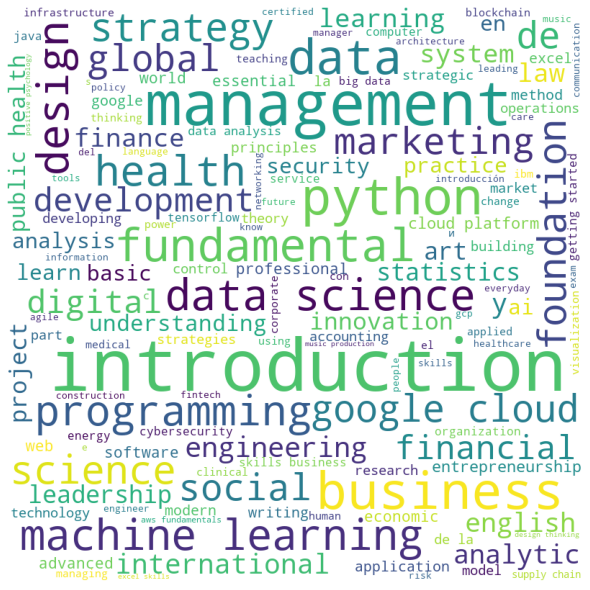

In [97]:
words_str = ' '.join(words)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', 
                min_font_size = 10).generate(words_str)
                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [98]:
most_common_words = dict(pd.Series(words).value_counts()[:10])
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_words.keys())
temp["Count"] = list(most_common_words.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Course Titles', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

However, some terms such as "machine learning" or "data science" are interpreted as separate words, therefore, this list of words might be giving false impression.

First, let's create a function which plots a wordcloud of a certain number of words in a row.

In [99]:
def generate_ngram_word_cloud(n, words): 
  '''
  Generates and plots word cloud with n words in a row
  '''
  ngram = []

  for grams in ngrams(words.split(), n):
    grams = " ".join(grams)
    ngram.append(grams)
  
  count = pd.Series(ngram).value_counts() 
 
  wordcloud = WordCloud(collocations=False,
                        width = 800, height = 800,
                        background_color ='white',
                        min_font_size = 10).generate_from_frequencies(count)
                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

  return count

Let's try to plot list of two words in a row. We can see that most popular pair is "introduction to" which does not give a meaningful topic of the course.

The second one is data science and the third one is machine learning.

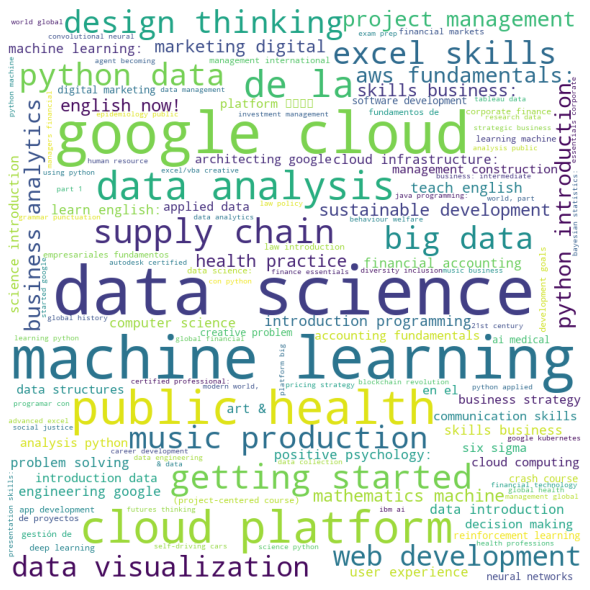

In [100]:
popular_2grams = generate_ngram_word_cloud(2, words_str)

In [101]:
most_common_words = dict(popular_2grams[:10])
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_words.keys())
temp["Count"] = list(most_common_words.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Course Titles', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

We can also plot three words in a row. However, we can see if we use more number of rows, the wordcloud becomes not so meaningful.

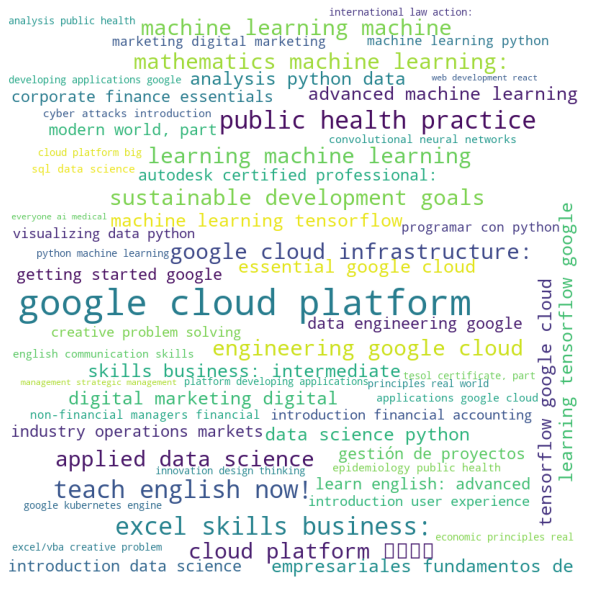

google cloud platform            11
excel skills business:            4
public health practice            4
teach english now!                4
sustainable development goals     3
                                 ..
skills business excel             1
business excel skills             1
skills business: advanced         1
business: advanced excel          1
для частного инвестора            1
Length: 3448, dtype: int64

In [102]:
generate_ngram_word_cloud(3, words_str)

Now let's check course title language to see if there are non english courses:

In [103]:
pip install langdetect # installing used package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from langdetect import detect
coursera_data['language'] = coursera_data['course_title'].apply(lambda x: detect(x))

In [105]:
languages = dict(pd.Series(coursera_data['language']).value_counts())
temp = pd.DataFrame(columns = ["languages" , 'count'])
temp["languages"] = list(languages.keys())
temp["count"] = list(languages.values())
fig = px.bar(temp, x="count", y="languages", title='Languages in Course Titles', orientation='h', 
             width=700, height=700,color='languages')
fig.show()

We see that the most popular language is english (715 courses), then spanish (47 courses) and then italian and french with the same numer of courses (17 courses).

### 2. Course Organizations Analysis

In [106]:
course_organization_occ = coursera_data['course_organization'].value_counts()
print(f'There are {len(course_organization_occ)} unique course organizations in the dataset.')

There are 154 unique course organizations in the dataset.


In [107]:
print(f'The most popular one is { course_organization_occ.keys()[0] } which created {course_organization_occ[0]} courses. ')
print(f'The second most popular one is { course_organization_occ.keys()[1] } which created {course_organization_occ[1]} courses. ')
print(f'The third most popular one is { course_organization_occ.keys()[2] } which created {course_organization_occ[2]} courses. ')

The most popular one is University of Pennsylvania which created 59 courses. 
The second most popular one is University of Michigan which created 41 courses. 
The third most popular one is Google Cloud which created 34 courses. 


### 3. Course Certification Type Analysis

In [108]:
certification_types = coursera_data['course_Certificate_type'].value_counts()
print(f'There are {len(certification_types)} unique course certification types.')

There are 3 unique course certification types.


From the barplot below we can see that the most popular certification type is "COURSE", then "SPECIALIZATION" and then "PROFFESSIONAL CERTIFICATE"

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64


Text(0, 0.5, 'Course Certificate Type Occurence')

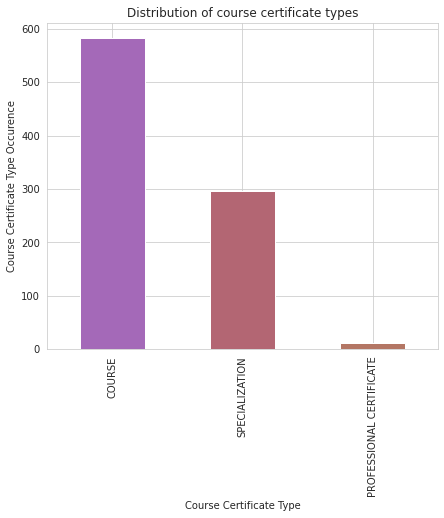

In [109]:
certification_types = coursera_data["course_Certificate_type"].value_counts()
print(certification_types)

certification_types.plot(kind='bar', figsize=(7, 6), color=['#a469b8', '#b36673', '#b37664'])
plt.title("Distribution of course certificate types")
plt.xlabel("Course Certificate Type")
plt.ylabel("Course Certificate Type Occurence")   

### 4. Course Rating Analysis

In [110]:
course_ratings = coursera_data['course_rating']
course_ratings.describe()

count    891.000000
mean       4.677329
std        0.162225
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: course_rating, dtype: float64

The overall rating of courses can be considered high as the mean of the course_rating is around 4.67

In [111]:
#histogram
fig = px.histogram(coursera_data, title='Distribution of course ratings', x="course_rating")
fig.show()

### 5. Students Enrollment Analysis

The column "course_students_enrolled" does not have integer type even though it is a numeric value. This value is represented as a string for better readibility:
* letter "k" at the end of the value means thousands
* letter "m" at the end of the value means millions

I will turn these values into integers for future analysis.

In [112]:
students_enrolled = coursera_data['course_students_enrolled']
coursera_data['course_students_enrolled'] = [float(x[:-1]) * 1000 if "k" in x else float(x[:-1]) * 1000000 for x in students_enrolled]

In [113]:
avg_students_enrolled = np.mean(coursera_data['course_students_enrolled'])
max_students_enrolled = max(coursera_data['course_students_enrolled'])
min_students_enrolled = min(coursera_data['course_students_enrolled'])
print(f"Average enrolled student number is {avg_students_enrolled}")
print(f"Max enrolled student number is {max_students_enrolled}")
print(f"Min enrolled student number is {min_students_enrolled}")

Average enrolled student number is 90552.07631874298
Max enrolled student number is 3200000.0
Min enrolled student number is 1500.0


We do not know yet if the average value gives accurate value for our dataset. Therefore, looking for outliers would be a useful addition.

In [114]:
fig = px.histogram(coursera_data, title='Distribution of students enrolled in courses', x="course_students_enrolled")
fig.show()

The histogram is a plot which can be helpful to show the outliers.

In [115]:
fig = px.box(coursera_data, title='Boxplot for students enrolled in courses', y="course_students_enrolled")
fig.show()

A plot above is called a box plot which allows to identify the univariate outliers, or outliers for one variable. Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data.

In [116]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [117]:
outliers = find_outliers_IQR(coursera_data["course_students_enrolled"])
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 78
max outlier value: 3200000.0
min outlier value: 230000.0


We can get the outliers by using the interquartile range method. The outlier data points are the ones falling below 25th percentile or above 75th percentile of the dataset.

In [118]:
median_students_enrolled = np.median(coursera_data['course_students_enrolled'])
print(f"Median of enrolled student number is {median_students_enrolled}.")

Median of enrolled student number is 42000.0.


In [119]:
max_students_enrolled = max(coursera_data['course_students_enrolled'])
min_students_enrolled = min(coursera_data['course_students_enrolled'])

print(f"Maximum number of students enrolled in a course is {max_students_enrolled}")
print(f"Minimum number of students enrolled in a course is {min_students_enrolled}")

Maximum number of students enrolled in a course is 3200000.0
Minimum number of students enrolled in a course is 1500.0


### 6. Analysing and comparing course_students_enrolled and course_rating

First, it is important to see which course has the best review and which one has the worst.

The histogram below shows the distribution of rating among different courses.

In [120]:
rated_less_than_four = len(coursera_data[coursera_data["course_rating"] < 4])
rated_more_than_four_less_than_five = len(coursera_data[(coursera_data["course_rating"] >= 4) & coursera_data["course_rating"] <= 5])

print(f'There are {rated_less_than_four} courses that have rating lower than 4.0')
print(f'There are {rated_more_than_four_less_than_five} courses that have rating greater or equal to 4.0')

There are 4 courses that have rating lower than 4.0
There are 891 courses that have rating greater or equal to 4.0


In [121]:
max_rating = max(coursera_data['course_rating'])
max_rating_courses = coursera_data[coursera_data['course_rating'] == max_rating]
print(f"There are {len(max_rating_courses)} courses with best rating - {max_rating}")

There are 2 courses with best rating - 5.0


In [122]:
print("Courses with best rating:")
max_rating_courses[["course_title", "course_organization", "course_rating", "course_students_enrolled"]]

Courses with best rating:


,course_title,course_organization,course_rating,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,5.0,1500.0
432,Infectious Disease Modelling,Imperial College London,5.0,1600.0


In [123]:
min_rating = min(coursera_data['course_rating'])
min_rating_courses = coursera_data[coursera_data['course_rating'] == min_rating]
print(f"There is {len(min_rating_courses)} course with worst rating - {min_rating}")

There is 1 course with worst rating - 3.3


In [124]:
print("Course with worst rating:")
min_rating_courses[["course_title", "course_organization", "course_rating", "course_students_enrolled"]]

Course with worst rating:


,course_title,course_organization,course_rating,course_students_enrolled
413,How To Create a Website in a Weekend! (Project...,The State University of New York,3.3,140000.0


Even though the code above finds the worst and best rated courses, it can be a bit biased because it does not take into account the amount of people enrolled in the course.

Therefore, the code below checks the rating of the most and least popular courses.

In [125]:
max_num_reviewed_course = coursera_data[coursera_data['course_students_enrolled'] == max_students_enrolled]
print("Course which has maximum number of students enrolled is called " + str(max_num_reviewed_course["course_title"].iloc[0]))
print("It is conducted by " + str(max_num_reviewed_course["course_organization"].iloc[0]))
print("It's rating is " + str(max_num_reviewed_course["course_rating"].iloc[0]))
print("And it's difficulty is " + str(max_num_reviewed_course["course_difficulty"].iloc[0]))

Course which has maximum number of students enrolled is called Machine Learning
It is conducted by Stanford University
It's rating is 4.9
And it's difficulty is Mixed


In [126]:
min_num_reviewed_course = coursera_data[coursera_data['course_students_enrolled'] == min_students_enrolled]
print("Course which has minimum number of students enrolled is called " + str(min_num_reviewed_course["course_title"].iloc[0]))
print("It is conducted by " + str(min_num_reviewed_course["course_organization"].iloc[0]))
print("It's rating is " + str(min_num_reviewed_course["course_rating"].iloc[0]))
print("And it's difficulty is " + str(min_num_reviewed_course["course_difficulty"].iloc[0]))

Course which has minimum number of students enrolled is called El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho
It is conducted by Universidad Austral
It's rating is 5.0
And it's difficulty is Beginner


We can see that course_rating is larger for the least popular course than the most popular one.

Another useful view of comparing these two values would be sort the course by popularity, take top 200 courses with most amount of students enrolled, and then take the best and worst reviewed ones. This then would not show courses with small amount of enrolled students and would show more accurate results.

In [127]:
top_200_num_of_students = coursera_data.sort_values(by=['course_students_enrolled'], ascending=False).head(200)
top_200_num_of_students = top_200_num_of_students[['course_title', 'course_students_enrolled', 'course_rating', 'course_difficulty']]
top_200_num_of_students

,course_title,course_students_enrolled,course_rating,course_difficulty
564,Machine Learning,3200000.0,4.9,Mixed
815,The Science of Well-Being,2500000.0,4.9,Mixed
688,Python for Everybody,1500000.0,4.8,Beginner
674,Programming for Everybody (Getting Started wit...,1300000.0,4.8,Mixed
196,Data Science,830000.0,4.5,Beginner
...,...,...,...,...
243,Dynamic Public Speaking,110000.0,4.7,Beginner
682,Python Basics,110000.0,4.8,Beginner
724,Sexualidad...mucho más que sexo,110000.0,4.8,Beginner
527,Introduction to the Biology of Cancer,110000.0,4.8,Beginner


The dataset below shows the courses which the highest rating which is 4.9

The best reviewed course will be considered the one which the highest number of students enrolled. We can see that this calculation also shows different best reviewed courses which have way more students enrolled.

In [128]:
max_review_in_top_200 = max(top_200_num_of_students['course_rating'])
top_200_num_of_students[top_200_num_of_students['course_rating'] == max_review_in_top_200].head()

,course_title,course_students_enrolled,course_rating,course_difficulty
564,Machine Learning,3200000.0,4.9,Mixed
815,The Science of Well-Being,2500000.0,4.9,Mixed
626,Neural Networks and Deep Learning,630000.0,4.9,Intermediate
684,Python Data Structures,420000.0,4.9,Mixed
322,First Step Korean,400000.0,4.9,Beginner


Nevertheless, the calculations are the same for the worst reviewed course.

In [129]:
min_review_in_top_200 = min(top_200_num_of_students['course_rating'])
top_200_num_of_students[top_200_num_of_students['course_rating'] == min_review_in_top_200].head()

,course_title,course_students_enrolled,course_rating,course_difficulty
413,How To Create a Website in a Weekend! (Project...,140000.0,3.3,Mixed


The number of enrolled students seems to be important but it would be useful to see if these two values form a linear relationship.

A scatter plot can help to see whether these two values depend on each other.

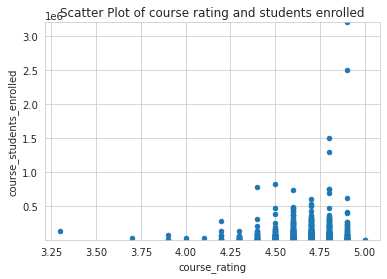

In [130]:
data = pd.concat([coursera_data['course_rating'], coursera_data['course_students_enrolled']], axis=1)
data.plot.scatter(title='Scatter Plot of course rating and students enrolled', x='course_rating', y='course_students_enrolled', ylim=(8000,3200000));

Another important plot would be KDE plot. A kernel density estimate plot is a method for visualizing the distribution of observations in a dataset

We can see that there is a strong mode for course_rating and course_students_enrolled.

Text(0, 0.5, 'Number of students enrolled')

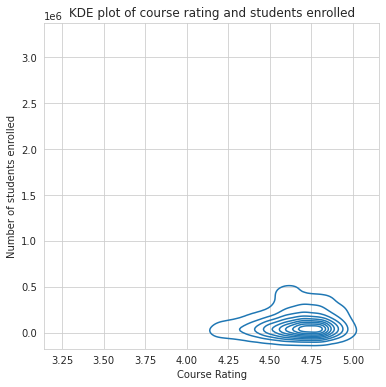

In [131]:
fig = plt.figure(figsize=(6,6))  
ax = fig.gca()  
sns.set_style("whitegrid")
sns.kdeplot(data=coursera_data,x='course_rating',y='course_students_enrolled')
ax.set_title('KDE plot of course rating and students enrolled') 
ax.set_xlabel('Course Rating') 
ax.set_ylabel('Number of students enrolled') 

### 7. Analysing and comparing courses difficulty

Another important task would be to find out which course difficulty is the most popular among course creators. From the code below we can see that most of the courses are in "Beginner" difficulty and the least - Advanced.

In [132]:
coursera_data["course_difficulty"].value_counts()

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64

Text(0, 0.5, 'Course Difficulty Occurence')

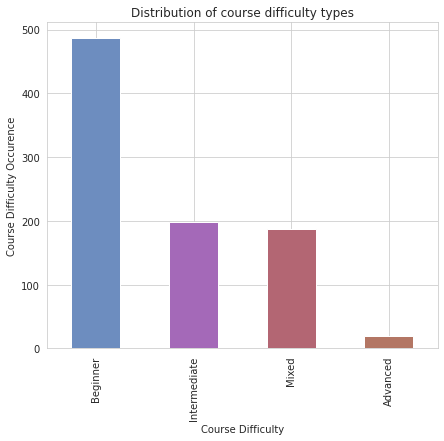

In [133]:
coursera_data["course_difficulty"].value_counts().plot(kind='bar', figsize=(7, 6), color=['#6d8dbf', '#a469b8', '#b36673', '#b37664'])
plt.title("Distribution of course difficulty types")
plt.xlabel("Course Difficulty")
plt.ylabel("Course Difficulty Occurence") 

Now we'll see what difficulty course people usually enroll for. So I will take top 50 most enrolled courses and check their difficulty types.

In [134]:
top_50_num_of_students = coursera_data.sort_values(by=['course_students_enrolled'], ascending=False).head(50)
top_50_num_of_students["course_difficulty"].value_counts()

Beginner        25
Mixed           13
Intermediate    11
Advanced         1
Name: course_difficulty, dtype: int64

We can see that advanced courses are not as popular as the other types with only 1 course in the top 50.

### 8. Feature Correlation

Previously, I checked the dependency of course rating and students enrolled. However, I did not find linear relationship. Now, I want to check these features correlation.

Also, I want to check whether course difficulty and certification type have something in common. But first, we need to convert these categoric values into numeric.

Let's do one hot encoding:

In [135]:
'''
Encoding Course Difficulty
''' 
encoded_data = coursera_data
encoded_data = pd.get_dummies(encoded_data, prefix="difficulty", columns = ['course_difficulty'])
encoded_data = pd.get_dummies(encoded_data, prefix="certificate", columns = ['course_Certificate_type'])
encoded_data 

,course_title,course_organization,course_rating,course_students_enrolled,language,difficulty_Advanced,difficulty_Beginner,difficulty_Intermediate,difficulty_Mixed,certificate_COURSE,certificate_PROFESSIONAL CERTIFICATE,certificate_SPECIALIZATION
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,4.7,5300.0,en,0,1,0,0,0,0,1
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,4.7,17000.0,en,0,0,1,0,1,0,0
2,A Crash Course in Data Science,Johns Hopkins University,4.5,130000.0,en,0,0,0,1,1,0,0
3,A Law Student's Toolkit,Yale University,4.7,91000.0,en,0,0,0,1,1,0,0
4,A Life of Happiness and Fulfillment,Indian School of Business,4.8,320000.0,en,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,4.5,52000.0,ru,0,0,1,0,0,0,1
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,4.8,21000.0,bg,0,0,0,1,1,0,0
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,4.5,30000.0,ru,0,0,1,0,0,0,1
889,Русский как иностранный,Saint Petersburg State University,4.6,9800.0,ru,0,0,1,0,0,0,1


Text(0.5, 1.0, 'Heatmap of coursera dataset features')

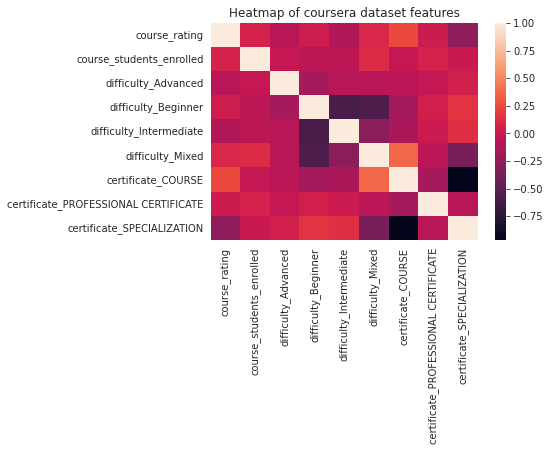

In [136]:
p = sns.heatmap(encoded_data.corr())
p.set_title("Heatmap of coursera dataset features")

In [137]:
import itertools 
corr_df = pd.DataFrame([[(i,j), encoded_data.corr().loc[i,j]]
                   for i,j in list(itertools.combinations(encoded_data.corr(), 2))],columns=['feature_pairs','corr'])    
corr_df = corr_df.sort_values(by='corr',ascending=False)
corr_df

,feature_pairs,corr
30,"(difficulty_Mixed, certificate_COURSE)",0.375537
5,"(course_rating, certificate_COURSE)",0.251534
25,"(difficulty_Beginner, certificate_SPECIALIZATION)",0.161009
29,"(difficulty_Intermediate, certificate_SPECIALI...",0.143168
11,"(course_students_enrolled, difficulty_Mixed)",0.122108
4,"(course_rating, difficulty_Mixed)",0.099265
0,"(course_rating, course_students_enrolled)",0.071090
13,"(course_students_enrolled, certificate_PROFESS...",0.064352
20,"(difficulty_Advanced, certificate_SPECIALIZATION)",0.060429
24,"(difficulty_Beginner, certificate_PROFESSIONAL...",0.047744


From the correlation table above we can see that the correlations between different types of certifications and difficulty levels are not relevent.

The strongest positive correlation is between courses with difficulty level "Mixed" and certification type COURSE.

In [138]:
Mixed_and_COURSE = coursera_data[(coursera_data['course_difficulty'] == "Mixed") & (coursera_data['course_Certificate_type'] == "COURSE")]
all_Mixed = coursera_data[coursera_data["course_difficulty"] == "Mixed"]
ratio = len(Mixed_and_COURSE)/len(all_Mixed)*100
print(f'{len(Mixed_and_COURSE)} out of {len(all_Mixed)} courses with Mixed difficulty have COURSE certficate ({ratio}%)')

187 out of 187 courses with Mixed difficulty have COURSE certficate (100.0%)


We can also see that in the scatter plot below

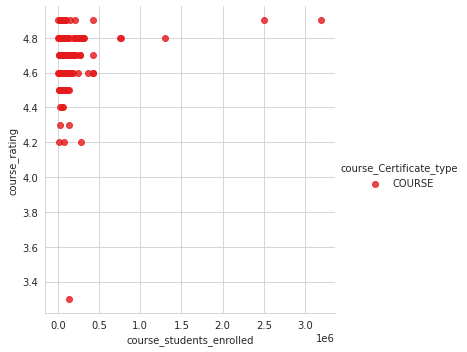

In [146]:
sns.lmplot(x = 'course_students_enrolled', y = 'course_rating', 
           data = all_Mixed,  
           hue = "course_Certificate_type", 
           palette="Set1", fit_reg = False) 

There is also strong positive correlation between course_rating and certificate COURSE which could indicate higher rating for COURSE certification courses.

In [143]:
courses_COURSE = coursera_data[(coursera_data['course_Certificate_type'] == "COURSE") & (coursera_data['course_rating'] > 4.5)]
all_COURSE_high_rating = coursera_data[coursera_data['course_rating'] > 4.5]
ratio = len(courses_COURSE)/len(all_COURSE_high_rating)*100
print(f'{len(courses_COURSE)} out of {len(all_COURSE_high_rating)} all courses with COURSE certificate ({ratio}%)')

517 out of 745 all courses with COURSE certificate (69.39597315436241%)


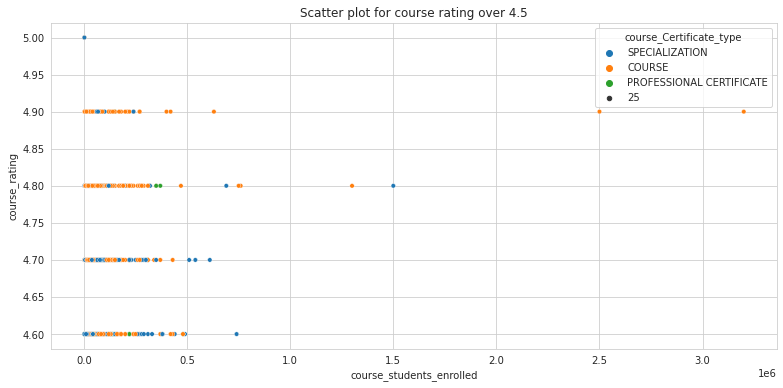

In [144]:
plt.figure(figsize=(13,6)) 
sns.scatterplot(x=all_COURSE_high_rating['course_students_enrolled'], y=all_COURSE_high_rating['course_rating'],
               hue=all_COURSE_high_rating['course_Certificate_type'],
               size=25,
               sizes=(20,600))
 
plt.title("Scatter plot for course rating over 4.5")
plt.show() 

## Summary and Future Improvements

### **Why I did such analysis**
* I wanted to know what kind of topics are the most popular in coursera
* I wanted to know what kind of languages are used
* I wanted to see what is the relationship between course rating and number of students enrolled.
* I wanted to see what certificate types and difficulty levels are the most popular.

#### **Title analysis**:
* Most popular topics in the data science were:
	* data science
	* machine learning
	* google cloud
	* public health
	* cloud platform
	* data analysis
	* Other words like: introduction, management, business, python were also very popular

#### **Course Organization Analysis**:
* There were 154 unique course organizations in the dataset.
1) University of Pennsylvania
2) University of Michigan
3) Google Cloud


#### **Course Certification Types**:
* COURSE - 582 courses
* SPECIALIZAITON - 297 courses
* PROFFESSIONAL CERTIFICATE - 12 courses


#### **Course Rating Analysis:**
* Analysed course rating in various ways
* mean       4.677329
* min        3.300000
* max        5.000000

#### **Course Student Enrollment:**
* Average enrolled student number is 90552.07631874298
* Max enrolled student number is 3200000.0
* Min enrolled student number is 1500.0


#### **Comparing Course Student Enrollment and Rating:**
* Analysed best and worst reviewed courses depending on the enrolled student number.

#### **Analysing Course Difficulty:**
All courses:
* Beginner        487
* Intermediate    198
* Mixed           187
* Advanced         19

Top 50 courses:
* Beginner        25
* Mixed           13
* Intermediate    11
* Advanced         1

#### Analysed correlation betwen features

### Future Work
* More in depth correlation analysis by taking more examples to explain those correlations
* Better text processing approach for title analysis
* Better structured notebook
* Use bigger variety of libaries for visualisations